### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

In [ ]:
def cargar_datos(urls:list[str]):
	'''Carga y concatena los datos de varias tiendas en un solo dataframe, agregando una columna 'Tienda_id' para identificar la tienda de origen.'''
	tiendas = []

	for i, url in enumerate(urls):
		tienda = pd.read_csv(url)

		tienda['Tienda_id'] = i + 1

		tiendas.append(tienda)

	return pd.concat(tiendas, ignore_index=True)

In [3]:
urls = [url, url2, url3, url4]
# urls = [url, url3, url4]

datos = cargar_datos(urls)

In [4]:
datos.tail(2358)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda_id
7077,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,4
7078,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782,4
7079,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,4
7080,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359,4
7081,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,4


In [5]:
datos[['Tienda_id']].value_counts().reset_index()

,Tienda_id,count
0,1,2359
1,2,2359
2,3,2359
3,4,2358


### Verificación de valores nulos
Desciripcion: Buscar en cada una de las tienda la existencia de valores faltantes

In [6]:
# Analizar si hay valores nulos en cada una de las tiendas
valores_nulos = lambda datos: datos.groupby('Tienda_id').apply(lambda x: x.isnull().sum(), include_groups=False).transpose()

In [7]:
valores_nulos(datos)

Tienda_id,1,2,3,4
Producto,0,0,0,0
Categoría del Producto,0,0,0,0
Precio,0,0,0,0
Costo de envío,0,0,0,0
Fecha de Compra,0,0,0,0
Vendedor,0,0,0,0
Lugar de Compra,0,0,0,0
Calificación,0,0,0,0
Método de pago,0,0,0,0
Cantidad de cuotas,0,0,0,0


No se encontraron valores faltantes, por lo que no se debe hacer ningún tratamiento 

# 1. Análisis de facturación

In [ ]:
def suma_datos_por_columna (datos: pd.DataFrame, columna: str) -> pd.DataFrame: 
	''' Función para sumar los datos agrupados por tienda, de la columna especificada y ordenarlos de forma descendente.'''
	return datos.groupby('Tienda_id',as_index=False)[[columna]].sum().sort_values(ascending=False, by=columna)

In [9]:
ingreso_total = suma_datos_por_columna(datos, 'Precio')

In [10]:
ingreso_total = ingreso_total.rename(columns={'Precio':'Ingreso Total'})
ingreso_total

,Tienda_id,Ingreso Total
0,1,1.150880e+09
1,2,1.116344e+09
2,3,1.098020e+09
3,4,1.038376e+09


# 2. Ventas por categoría

In [ ]:
def agrupar_contar (datos:pd.DataFrame, columna:str) -> pd.DataFrame: 
	'''Función para agrupar datos por Tienda y contar los valores de la columna especificada.'''
	grupos = datos.groupby('Tienda_id', as_index=False)[[columna]].value_counts()
	
	return grupos.sort_values(by=['Tienda_id', 'count'], ascending=[True, False])

def elementos_mas_relevantes(datos:pd.DataFrame, columna:str, cantidad:int) -> pd.DataFrame:
	categorias = agrupar_contar(datos, columna)
	return categorias.groupby('Tienda_id').head(cantidad)

def elementos_menos_relevantes(datos:pd.DataFrame, columna:str, cantidad:int) -> pd.DataFrame:
	categorias = agrupar_contar(datos, columna)
	return categorias.groupby('Tienda_id').tail(cantidad)

In [12]:
categorias_mas_populares = elementos_mas_relevantes(datos, 'Categoría del Producto', 8)

In [13]:
categorias_mas_populares

,Tienda_id,Categoría del Producto,count
0,1,Muebles,465
1,1,Electrónicos,448
2,1,Juguetes,324
3,1,Electrodomésticos,312
4,1,Deportes y diversión,284
5,1,Instrumentos musicales,182
6,1,Libros,173
7,1,Artículos para el hogar,171
8,2,Muebles,442
9,2,Electrónicos,422


# 3. Calificación promedio de la tienda


In [ ]:
# media_por_tienda = lambda datos, columna: datos.groupby('Tienda_id')[[columna]].mean()
def media_por_tienda (datos: pd.DataFrame, columna:str, decimales:int = 2) -> pd.DataFrame:
	'''Función para calcular la media de una columna agrupada por tienda y ordenada de forma descendente.'''
	return datos.groupby('Tienda_id', as_index=False)[[columna]].mean().round(decimales).sort_values(ascending=False, by=columna)

In [15]:
media_valoracion = media_por_tienda(datos, 'Calificación', decimales=3)

In [16]:
media_valoracion = media_valoracion.rename(columns={'Calificación':'Calificación promedio'})
media_valoracion

,Tienda_id,Calificación promedio
2,3,4.048
1,2,4.037
3,4,3.996
0,1,3.977


# 4. Productos más y menos vendidos

In [17]:
productos_mas_vendidos = elementos_mas_relevantes(datos, 'Producto', 5)
productos_menos_vendidos = elementos_menos_relevantes(datos, 'Producto', 5)

In [18]:
productos_mas_vendidos


,Tienda_id,Producto,count
0,1,Armario,60
1,1,Microondas,60
2,1,TV LED UHD 4K,60
3,1,Secadora de ropa,58
4,1,Bloques de construcción,56
51,2,Iniciando en programación,65
52,2,Microondas,62
53,2,Batería,61
54,2,Guitarra acústica,58
55,2,Pandereta,58


In [19]:
productos_menos_vendidos

,Tienda_id,Producto,count
46,1,Mochila,39
47,1,Pandereta,36
48,1,Olla de presión,35
49,1,Auriculares con micrófono,33
50,1,Celular ABXY,33
97,2,Auriculares,37
98,2,Sillón,35
99,2,Impresora,34
100,2,Mesa de comedor,34
101,2,Juego de mesa,32


# 5. Envío promedio por tienda

In [20]:
media_por_envio = media_por_tienda(datos, 'Costo de envío')

In [21]:
media_por_envio

,Tienda_id,Costo de envío
0,1,26018.61
1,2,25216.24
2,3,24805.68
3,4,23459.46


# 6. Generando gráficos

In [22]:
import matplotlib.pyplot as plt
import numpy as np

## 6.1 Gráfico de facturación mensual por tienda

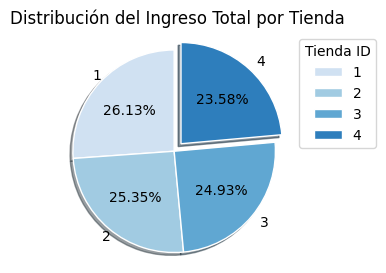

In [23]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(list(ingreso_total['Tienda_id']))))

def explode_values(data:list) -> tuple:
	index = data.index(min(data))
	explode = [0] * len(data)
	explode[index] = 0.1
	return tuple(explode)
	

fig, ax = plt.subplots(figsize= (4, 3))

ax.pie(
	list(ingreso_total['Ingreso Total']), 
	explode=explode_values(list(ingreso_total['Ingreso Total'])),
	labels=list(ingreso_total['Tienda_id']),
	autopct='%1.2f%%',
	startangle=90,
	colors= colors,
	# radius=1,
	center=(4,4),
	wedgeprops={"linewidth": 1, "edgecolor": "white"},
	frame=True,
	shadow=True 
)
ax.set_title('Distribución del Ingreso Total por Tienda')
ax.axis('off') 
ax.legend(title='Tienda ID', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## 6.2 Gráficas de calificación promedio y costo de envío por tienda

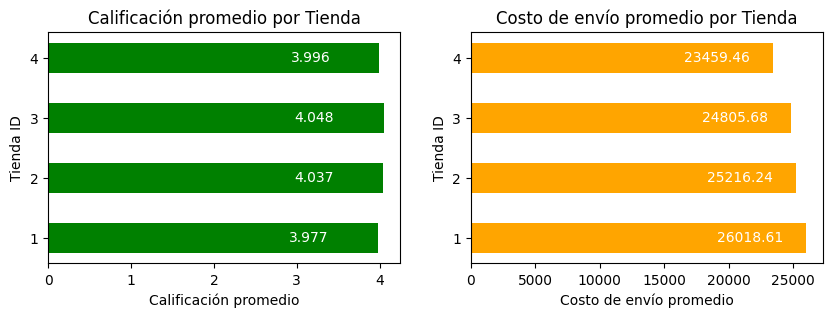

In [24]:
fig, ax = plt.subplots(figsize= (10, 3), nrows=1, ncols=2)

ax[0].barh(
	list(media_valoracion['Tienda_id']),
	list(media_valoracion['Calificación promedio']),
	align='center',
	color='green',
	height=0.5,
)
ax[0].set_yticks(list(media_valoracion['Tienda_id']))
ax[0].bar_label(ax[0].containers[0], fmt='%.3f', padding=-64, color='white')
ax[0].set_title('Calificación promedio por Tienda')
ax[0].set_ylabel('Tienda ID')
ax[0].set_xlabel('Calificación promedio')

ax[1].barh(
	list(media_por_envio['Tienda_id']),
	list(media_por_envio['Costo de envío']),
	align='center',
	color='orange',
	height=0.5,
)

ax[1].set_yticks(list(media_por_envio['Tienda_id']))
ax[1].bar_label(ax[1].containers[0], fmt='%.2f', padding=-64, color='white')
ax[1].set_title('Costo de envío promedio por Tienda')
ax[1].set_ylabel('Tienda ID')
ax[1].set_xlabel('Costo de envío promedio')
plt.show()

## 6.3 Mapa de calor de ventas por categoría y tienda

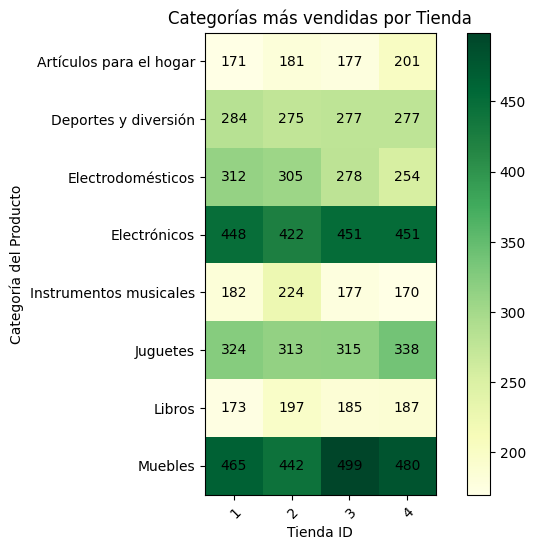

In [ ]:
# Heatmap de categorias más vendidas por tienda
fig, ax = plt.subplots(figsize=(8, 6))
heatmap_data = categorias_mas_populares.pivot(index='Categoría del Producto', columns='Tienda_id', values='count').fillna(0)
im = ax.imshow(heatmap_data, cmap='YlGn')

ax.set_xticks(np.arange(heatmap_data.shape[1]))
ax.set_yticks(np.arange(heatmap_data.shape[0]))
ax.set_xticklabels(heatmap_data.columns)
ax.set_yticklabels(heatmap_data.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(heatmap_data.shape[0]):
	for j in range(heatmap_data.shape[1]):
		text = ax.text(j, i, int(heatmap_data.iat[i, j]), ha="center", va="center", color="black")

ax.set_title("Categorías más vendidas por Tienda")
fig.colorbar(im, ax=ax)
plt.xlabel('Tienda ID')
plt.ylabel('Categoría del Producto')
plt.show()


# 7. Informe final

El siguiente informe resume los hallazgos clave del análisis de datos realizados con la intención de ayudar al Sr. Juan qué tienda de su cadena Alura Store  debe vender para iniciar un nuevo emprendimiento. Para ello, se analizaron los datos de ventas, rendimiento y reseñas de clientes de las cuatro tiendas. Con base en los análisis realizados, se pueden destacar las siguientes observaciones que ayudarán a seleccionar la tienda con menor rendimiento y realizar su venta:

En el análisis de los ingresos totales se encontró que la cuarta tienda es la que tiene una menor cantidad de ingresos, participando con un 23.58% y la primera tienda participando con un 26.13% teniendo una diferencia de 2.55 puntos porcentuales con respecto a los ingresos totales de todas las tiendas como se observa en la gráfica del apartado 6.1.

Posteriormente, se realizó un acomparativa de la calificación media por tienda y el coste de envío promedio por tienda, ya que podía haber una relación directa entre la valoración del cliente y el coste debido a que este es pagado con el cliente. Bajo el análisis de las gráficas del apartado 6.2 se encontró que, si bien no es la que tiene peor valoración, es de destacar que tiene una valoración promedio por debajo de 4. 

Con las gráficas del apartado 6.1 y 6.2 se puede deducir que el ingreso total por tienda y los costes de envíos tienen una relación importante, ya que la media de coste de envío al ser más baja, indica que los productos tienen un menor valor y calidad, lo que se traduce en menores ingresos totales. Además, se observa que la segunda y tercera tienen un mejor equilibrio entre los ingresos totales, la calificación promedio y el coste de envío, lo que las hace más atractivas para los clientes.

Por otra parte, se realizó un análisis de las categorías de productos más vendidas por tienda, encontrando que la distribución de las categorías es similar en todas las tiendas, como se observa en el apartado 6.3 con un mapa de calor, por lo que no hay una categoría que destaque negativamente en la tienda con menor rendimiento. Para finalizar este análisis, los productos más populares varían entre tiendas, pero este dato por sí solo no define el rendimiento general sin más contexto.

En conclusión, bajo el análisis realizado, **se recomienda considerar la venta de la cuarta tienda**, ya que presenta los ingresos totales más bajos, una calificación promedio inferior a 4, si bien los costes de envío son bajos, esto se traduce en menor interés en los productos con mayor valor, lo que afecta negativamente los ingresos totales de la tienda.

# 8. Extra

In [28]:
locaciones = list(datos.groupby('Tienda_id')[['lat', 'lon']].apply(lambda x: [(x.iloc[i]['lat'], x.iloc[i]['lon']) for i in range(len(x))]))

In [29]:
centro = list(datos[['lat', 'lon']].mean())
centro

[5.428909498675146, -74.76010839639639]

In [30]:
import folium

In [32]:

m = folium.Map(location=centro, zoom_start=5)

# folium.Polygon(
#     locations=locaciones,
#     smooth_factor=2,
#     color='crimson',
#     noclip=True,
# ).add_to(m)

for tienda in locaciones:
	for loc in tienda:
		folium.Marker(
			location=loc,
			icon=folium.Icon(color='blue', icon='info-sign')
		).add_to(m)

m.save('mapa_tiendas.html')